In [ ]:
from google.colab import files
uplo = files.upload()

Saving nation_level_daily.csv to nation_level_daily.csv


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('nation_level_daily.csv',index_col='Date',parse_dates=True)
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2021-01-30,1,1,0,0,0,0
2021-01-31,0,1,0,0,0,0
2021-01-02,0,1,0,0,0,0
2021-02-02,1,2,0,0,0,0
2021-03-02,1,3,0,0,0,0


In [ ]:
df.tail()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date,,,,,,
2021-02-08,52672,1804857,40355,1187261,760,38180
2021-03-08,50488,1855345,43070,1230331,806,38986
2021-04-08,51282,1906627,51220,1281551,849,39835
2021-05-08,56626,1963253,45583,1327134,919,40754
2021-06-08,62170,2025423,50141,1377275,899,41653


In [ ]:
df.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
count,189.000000,1.890000e+02,189.000000,1.890000e+02,189.000000,189.000000
mean,10716.523810,3.105051e+05,7287.169312,1.879557e+05,220.386243,7890.825397
std,15761.912194,4.947265e+05,11774.718763,3.229310e+05,291.715987,11386.921460
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,25.000000,1.710000e+02,1.000000,1.500000e+01,1.000000,3.000000
50%,2971.000000,4.643400e+04,1082.000000,1.284500e+04,92.000000,1566.000000
75%,14740.000000,4.117530e+05,10639.000000,2.281840e+05,384.000000,13278.000000
max,62170.000000,2.025423e+06,51368.000000,1.377275e+06,2004.000000,41653.000000


Plot your data


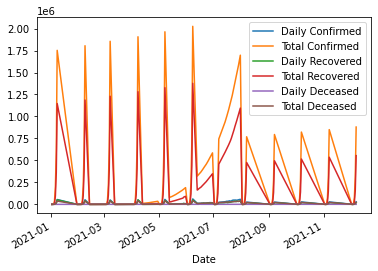

In [ ]:
df.plot()

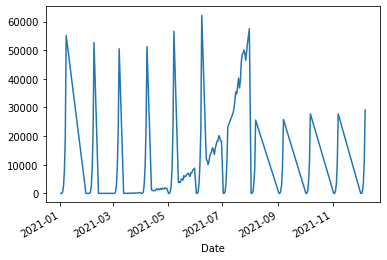

In [ ]:
df["Daily Confirmed"].plot()

Check for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Daily Confirmed'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Daily Confirmed'])

ADF Test Statistic : 4.5612445066279435
p-value : 1.0
#Lags Used : 13
Number of Observations Used : 175
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Time for Differencing


In [ ]:
df['Daily Confirmed'].shift(1)

Date
2021-01-30        NaN
2021-01-31        1.0
2021-01-02        0.0
2021-02-02        0.0
2021-03-02        1.0
               ...   
2021-02-08    55117.0
2021-03-08    52672.0
2021-04-08    50488.0
2021-05-08    51282.0
2021-06-08    56626.0
Name: Daily Confirmed, Length: 189, dtype: float64

In [ ]:
df['First Difference'] = df['Daily Confirmed'] - df['Daily Confirmed'].shift(1)

In [ ]:
df.head()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,First Difference
Date,,,,,,,
2021-01-30,1,1,0,0,0,0,NaN
2021-01-31,0,1,0,0,0,0,-1.0
2021-01-02,0,1,0,0,0,0,0.0
2021-02-02,1,2,0,0,0,0,1.0
2021-03-02,1,3,0,0,0,0,0.0


In [ ]:
df['First Difference'] = df['Daily Confirmed'] - df['Daily Confirmed'].shift(1)

In [ ]:
diff_2  = df['Daily Confirmed'].diff().diff().dropna()
print("p-value:", adfuller(diff_2.dropna())[1])

p-value: 0.0013135014765427073


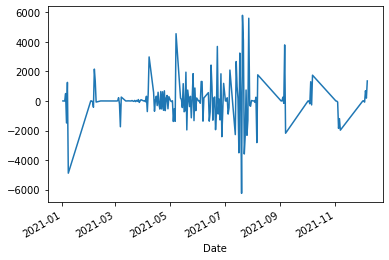

In [ ]:
diff_2.plot()

AR Model

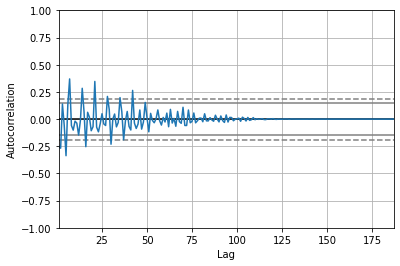

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(diff_2)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

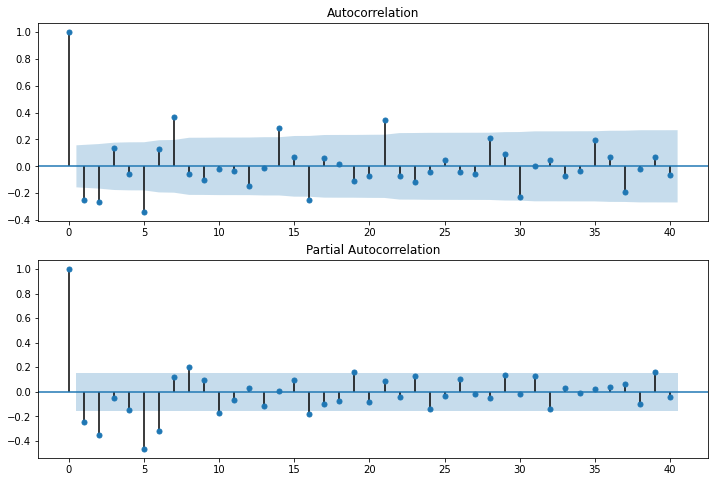

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff_2.iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff_2.iloc[30:],lags=40,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(diff_2,order=(0,2,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D2.Daily Confirmed   No. Observations:                  185
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1694.000
Method:                       css-mle   S.D. of innovations           2261.295
Date:                Mon, 05 Jul 2021   AIC                           3393.999
Time:                        08:10:46   BIC                           3403.660
Sample:                             2   HQIC                          3397.915
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0247      3.088      0.008      0.994      -6.028       6.077
ma.L1.D2.Daily Confirmed    -1.0000      0.013    -75.444      0.000      -1.026      -0.974
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
#print(df.shape)
#train=df.iloc[:-50]
#uptil last 50 is the training dataset
#test=df.iloc[-50:]
#last 50 taken as ttesting dataset
#print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(189, 7)
(139, 7) (50, 7)
Daily Confirmed      13829.0
Total Confirmed     381098.0
Daily Recovered      10741.0
Total Recovered     205181.0
Daily Deceased         343.0
Total Deceased       12606.0
First Difference       721.0
Name: 2021-06-18 00:00:00, dtype: float64 Daily Confirmed       62170.0
Total Confirmed     2025423.0
Daily Recovered       50141.0
Total Recovered     1377275.0
Daily Deceased          899.0
Total Deceased        41653.0
First Difference       5544.0
Name: 2021-06-08 00:00:00, dtype: float64


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Daily Confirmed'],order=(0,2,1))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D2.Daily Confirmed   No. Observations:                  137
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1043.995
Method:                       css-mle   S.D. of innovations            484.677
Date:                Mon, 05 Jul 2021   AIC                           2093.991
Time:                        08:56:53   BIC                           2102.751
Sample:                             2   HQIC                          2097.551
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.4832      1.036      2.398      0.018       0.453       4.513
ma.L1.D2.Daily Confirmed    -1.0000      0.019    -51.896      0.000      -1.038      -0.962
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=df.index[start:end+1]
print(pred)
#pred.index=index_future_dates


Date
2021-06-18    13362.736572
2021-06-19    13619.956344
2021-06-20    13879.659316
2021-06-21    14141.845489
2021-06-22    14406.514862
2021-06-23    14673.667436
2021-06-24    14943.303209
2021-06-25    15215.422184
2021-06-26    15490.024358
2021-06-27    15767.109733
2021-06-28    16046.678308
2021-06-29    16328.730084
2021-06-30    16613.265059
2021-01-07    16900.283236
2021-02-07    17189.784612
2021-03-07    17481.769189
2021-04-07    17776.236966
2021-05-07    18073.187944
2021-06-07    18372.622122
2021-07-07    18674.539500
2021-08-07    18978.940078
2021-09-07    19285.823857
2021-10-07    19595.190836
2021-11-07    19907.041016
2021-12-07    20221.374396
2021-07-13    20538.190976
2021-07-14    20857.490757
2021-07-15    21179.273738
2021-07-16    21503.539919
2021-07-17    21830.289301
2021-07-18    22159.521883
2021-07-19    22491.237665
2021-07-20    22825.436648
2021-07-21    23162.118831
2021-07-22    23501.284214
2021-07-23    23842.932798
2021-07-24    24187.064

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


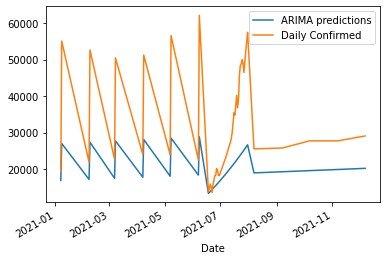

In [ ]:
pred.plot(legend=True)
test['Daily Confirmed'].plot(legend=True)

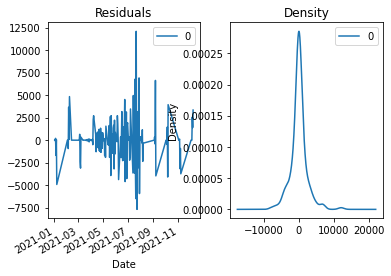

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

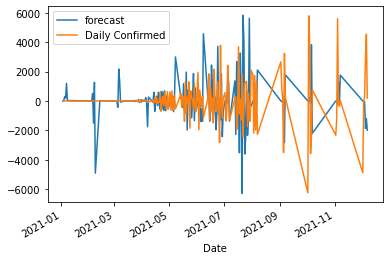

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
print(df.shape)
train=df['Daily Confirmed'].iloc[:-50]
#uptil last 50 is the training dataset
test=df['Daily Confirmed'].iloc[-50:]
#last 50 taken as ttesting dataset
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(189, 7)
(139,) (50,)
13829 62170


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


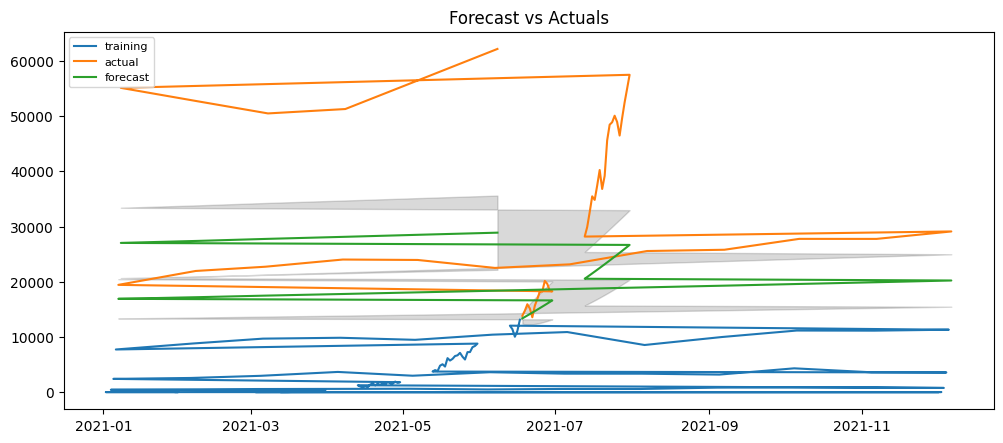

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(50, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.9212258479928735,
 'corr': 0.9801654971787098,
 'mae': 12558.965072926647,
 'mape': 0.31127944635930804,
 'me': -12525.104478440064,
 'minmax': 0.3112060827736711,
 'mpe': -0.308782352370622,
 'rmse': 16111.135303211046}

In [ ]:
index_future_dates=pd.date_range(start='2021-08-06',end='2021-09-06')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+31,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2021-08-06     63252.041390
2021-08-07     64341.205504
2021-08-08     65437.492343
2021-08-09     66540.901906
2021-08-10     67651.434194
2021-08-11     68769.089206
2021-08-12     69893.866943
2021-08-13     71025.767404
2021-08-14     72164.790589
2021-08-15     73310.936499
2021-08-16     74464.205133
2021-08-17     75624.596492
2021-08-18     76792.110575
2021-08-19     77966.747382
2021-08-20     79148.506914
2021-08-21     80337.389171
2021-08-22     81533.394151
2021-08-23     82736.521857
2021-08-24     83946.772286
2021-08-25     85164.145440
2021-08-26     86388.641319
2021-08-27     87620.259922
2021-08-28     88859.001249
2021-08-29     90104.865301
2021-08-30     91357.852077
2021-08-31     92617.961578
2021-09-01     93885.193803
2021-09-02     95159.548752
2021-09-03     96441.026426
2021-09-04     97729.626824
2021-09-05     99025.349947
2021-09-06    100328.195794
Freq: D, Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
test['Daily Confirmed'].mean()

33163.14

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Daily Confirmed']))
print(rmse)

16111.135303211046
